In [1]:
import pandas as pd # para crear tablas
from sklearn.tree import DecisionTreeClassifier # módulo para el clasificador
from sklearn.model_selection import train_test_split # para dividir conjunto de datos
from sklearn import metrics, svm # para evaluar el modelo
from sklearn.preprocessing import StandardScaler # para escalar los datos
from sklearn.model_selection import KFold, cross_val_score

# librerías para graficar
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('water_potability.csv')

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.shape

(3276, 10)

In [5]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [8]:
df.shape

(2011, 10)

In [9]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [10]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


In [11]:
X = df.drop("Potability", axis = 1) 
y = df["Potability"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [13]:
X_train.shape

(1407, 9)

In [14]:
X_test.shape

(604, 9)

In [15]:
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=5, splitter='best')

In [16]:
support_vector = svm.SVC(kernel = 'poly', C = 10, probability =True)

In [17]:
model_tree = tree.fit(X_train, y_train)

In [18]:
model_svc = support_vector.fit(X_train, y_train)

In [19]:
y_pred = model_tree.predict(X_test)

In [20]:
metrics.accuracy_score(y_test, y_pred)

0.6341059602649006

In [21]:
metrics.precision_score(y_test, y_pred)

0.5636363636363636

In [22]:
metrics.recall_score(y_test, y_pred)

0.13596491228070176

In [23]:
y_pred = model_svc.predict(X_test)

In [24]:
metrics.accuracy_score(y_test, y_pred)

0.6225165562913907

In [25]:
metrics.precision_score(y_test, y_pred)

c:\Users\adria\anaconda3\envs\aimbridge\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [26]:
metrics.recall_score(y_test, y_pred)

0.0

In [145]:
tree = DecisionTreeClassifier(criterion = 'gini', max_depth=1, splitter='best')

In [146]:
model_tree = tree.fit(X_train, y_train)

In [147]:
y_pred = model_tree.predict(X_test)

In [148]:
metrics.accuracy_score(y_test, y_pred)

0.640728476821192

In [149]:
metrics.f1_score(y_test, y_pred)

0.13545816733067728

In [150]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

In [151]:
confusion_matrix

array([[370,   6],
       [211,  17]], dtype=int64)

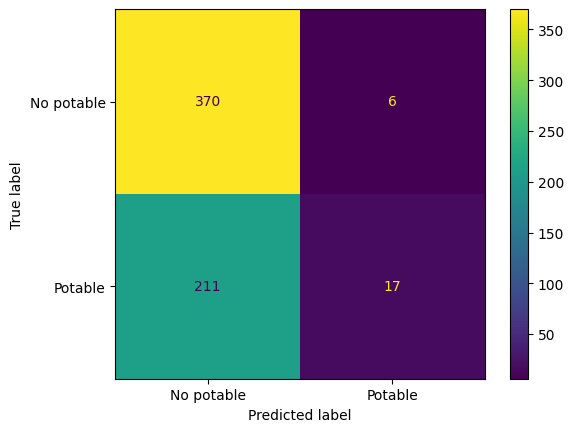

In [152]:
matriz_plot = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels =["No potable", "Potable"])
matriz_plot.plot()
plt.show()

In [153]:
y_pred_proba = model_tree.predict_proba(X_test)

In [154]:
y_pred_proba = y_pred_proba[:,1] 

In [155]:
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

0.5293019783501306

In [156]:
false_negative_rate, true_positive_rate, threshold = metrics.roc_curve(y_test, y_pred_proba)

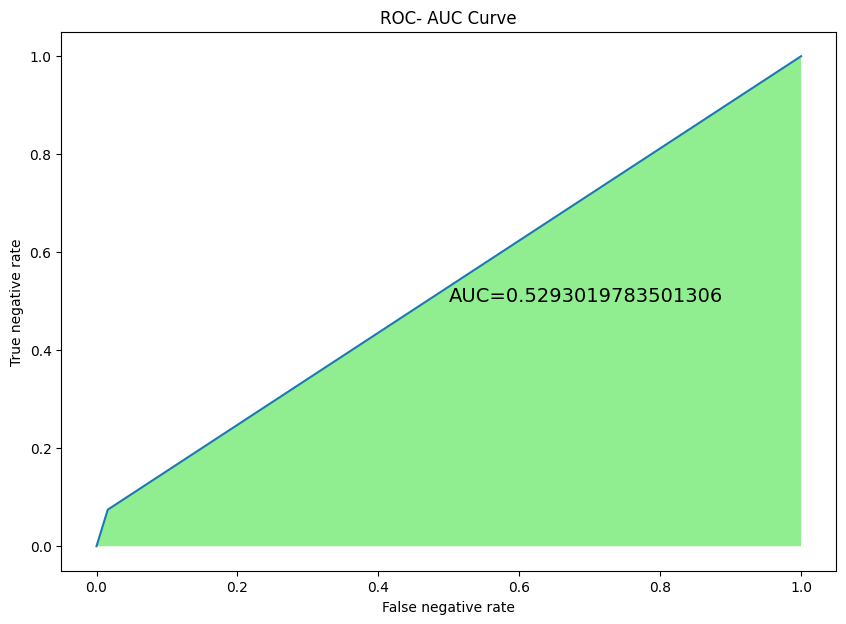

In [157]:
plt.figure(figsize=(10,7))
plt.plot(false_negative_rate, true_positive_rate)
plt.fill_between(false_negative_rate, true_positive_rate, facecolor="lightgreen")
plt.title("ROC- AUC Curve")
plt.text(.5,.5, "AUC=" + str(auc), fontsize=14)
plt.xlabel("False negative rate")
plt.ylabel("True negative rate")
plt.show()

In [158]:
k_folds = KFold(n_splits=10, random_state = 1, shuffle=True)

In [159]:
f1_scores = cross_val_score(model_tree, X , y, scoring ="f1", cv = k_folds)

In [160]:
print("Cross validation F1-scores:", f1_scores)

Cross validation F1-scores: [0.20408163 0.1686747  0.09411765 0.02222222 0.15533981 0.22429907
 0.13043478 0.08333333 0.13043478 0.20224719]


In [161]:
print("Mean Cross validation F1-scores:", f1_scores.mean())

Mean Cross validation F1-scores: 0.14151851615370517


In [162]:
results = pd.DataFrame({"Real": y_test, "Predicción": y_pred})
results = results.sample(n = 20)
results

,Real,Predicción
2675,0,0
901,0,0
2025,1,0
2434,1,0
2103,0,0
504,0,0
2041,1,0
654,0,0
1770,0,0
1012,0,0


### Conclusiones

Fue muy difícil intentar reducir el número de falsos positivos, lo cual en esta definición de problema es la parte más peligrosa. Asignar "gini" a la variable de criterion del clasificador mejora los scores de precisión, pero el modelo sigue estando sesgado hacia resultados negativos. Al intentar reducir este sesgo cambiando el max_depth a un valor más alto, el número de falsos positivos incrementó de manera significativa. Al final decidí usar un valor de max_depth de 1, ya que a pesar de que el modelo sigue sesgado, es la opción que más redujo la cantidad de falsos positivos. 